In [1]:
options(repr.plot.width = 15, repr.plot.height = 9)
# 맥에서는 실행해야 한글이 보임
Sys.setlocale(category = 'LC_ALL',locale = 'ko_KR.UTF-8')

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

## T 검정을 주로 많이씀

# 가설 검정
### 카이제곱 검정
: 두 범주형 변수가 서로 상관이 있는지 판단하는 통계적 검정 방법
예) 학력, 성별, 직업의 만족도

### child별 장난감 보유 현황
(돌아갈 귀, 없을 무 (증멸할 필요x, 상식?))
- 귀무가설 : child1과 child2의 장난감 보유수에 대한 만족도는 차이가 없다.
- 대립가설 : child1과 child2의 장난감 보유수에 대한 만족도는 차이가 있다.

In [2]:
# child별 장난감 보유 현황
child1 <- c(5, 11, 1)
child2 <- c(4, 7, 3)

In [3]:
toy <- cbind(child1, child2)
toy

child1,child2
5,4
11,7
1,3


In [4]:
# 행 이름
rownames(toy) <- c("car", "truck", "doll")
toy

,child1,child2
car,5,4
truck,11,7
doll,1,3


In [5]:
# 카이제곱 검정
chisq.test(toy)
# p-value가 중요

Warning message in chisq.test(toy):
“카이제곱 approximation은 정확하지 않을수도 있습니다”



	Pearson's Chi-squared test

data:  toy
X-squared = 1.7258, df = 2, p-value = 0.4219


### 결론
p-value(유의 수준) = 0.4219 > 0.05 --> 귀무가설 채택 (0.4219면 데이터를 60%정도 밖에 못씀)    
child1 과 child2의 데이터는 통계적으로 큰 차이가 없다.

Warning message in chisq.test(toy):    
“카이제곱 approximation은 정확하지 않을수도 있습니다”    
--> 데이터량이 적은 경우에 발생 : 피셔검정을 사용(표본수가 적거나 데이터의 분포가 치우친 경우)

In [38]:
fisher.test(toy)


	Fisher's Exact Test for Count Data

data:  toy
p-value = 0.5165
alternative hypothesis: two.sided


p-value(유의 수준) = 0.5165 > 0.05 --> 귀무가설

---
# t-검정
: 값 하나와 비교를 해주는 검정
- 귀무가설 : 건전지의 수명은 1000시간이다.
- 대립가설 : 건전지의 수명은 1000시간이 아니다.

In [7]:
# 데이터의 분포가 정규분포인지 확인 : shapiro-Wilk Test
# 귀무가설 : 자료가 정규분포를 따른다.
# 대립가설 : 자료가 정규분포를 따르지 않는다.

bat <- c(980, 1008, 968, 1032, 1012, 1002, 996, 1017)
shapiro.test(bat)


	Shapiro-Wilk normality test

data:  bat
W = 0.97706, p-value = 0.9469


p-value = 0.9469 > 0.05  --> 귀무가설     
W = 0.97706 ---> 1에 가까울수록 정규성에 가깝다.

In [8]:
# t-검정 # 건전지의 수명은 1000시간이다. 귀무가설
t.test(bat, mu=1000, alternative = "two.sided")

# mu : 비교대상,
# alternative
# - two.sided : 데이터가 mu와 다르다
# - greater : 데이터가 muq보다 크다.
# - less : 데이터가 mu보다 적다.


	One Sample t-test

data:  bat
t = 0.25891, df = 7, p-value = 0.8032
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
  984.7508 1018.9992
sample estimates:
mean of x 
 1001.875 


p-value = 0.8032 > 0.05 --> 귀무가설 : 건전지의 수명은 1000시간이다.

### 어떤 학습의 수학 점수가 올랐을까?
- 0교시 수업을 한 후에 학생들의 성적이 55점 보다 올랐을까?
- 귀무가설 : 성적은 오르지 않았다
- 대립가설 : 성적이 올랐다.

In [10]:
exam <- read.csv("../Data/exam.csv")
head(exam)

,no,score
,<int>,<int>
1,1,58
2,2,49
3,3,39
4,4,99
5,5,32
6,6,88


In [12]:
a <- exam$score

# 정규분포 확인
shapiro.test(a)


	Shapiro-Wilk normality test

data:  a
W = 0.91143, p-value = 0.1058


p-value = 0.1058 > 0.05 -> 귀무가설

In [14]:
mean(a)

[1] 56.17647

In [15]:
# t-검정
t.test(a, mu=55, alternative = "greater")


	One Sample t-test

data:  a
t = 0.24546, df = 16, p-value = 0.4046
alternative hypothesis: true mean is greater than 55
95 percent confidence interval:
 47.80855      Inf
sample estimates:
mean of x 
 56.17647 


p-value = 0.4046 > 0.05 -> 귀무가설

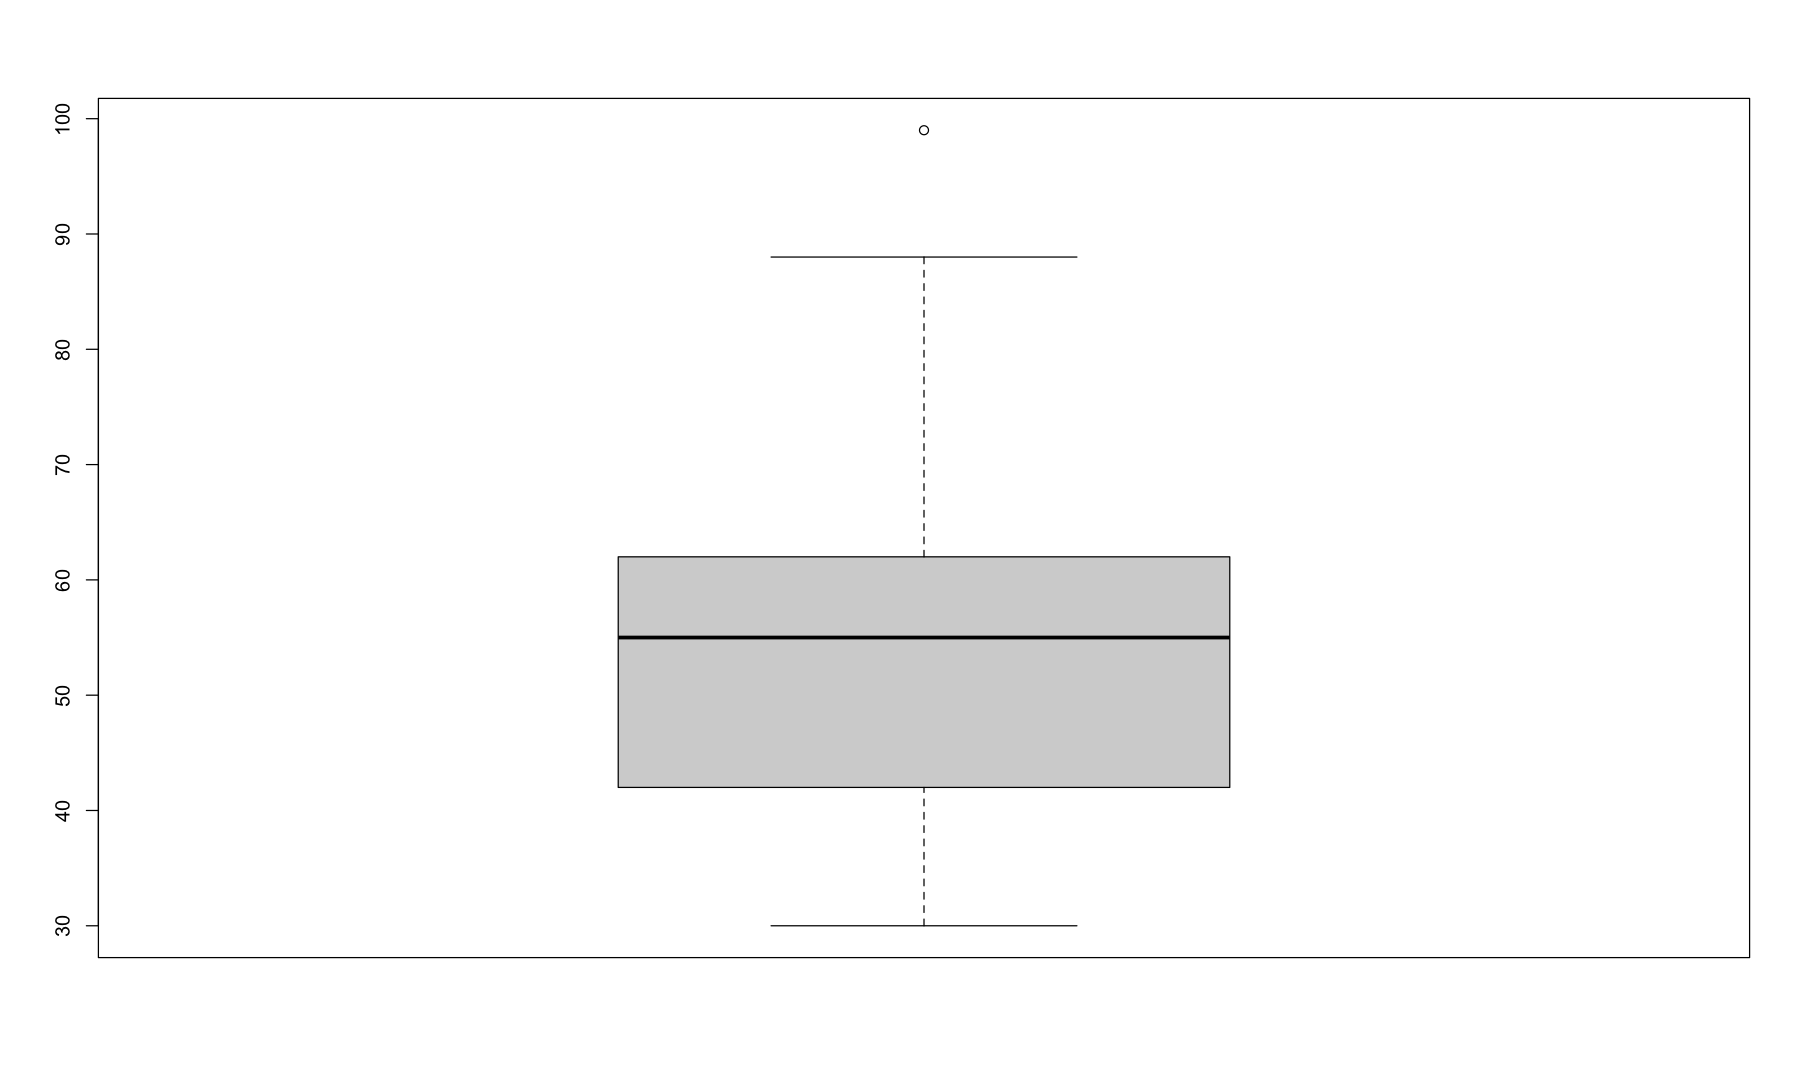

In [17]:
# 이상치 확인
par(bg = "white")
boxplot(a)

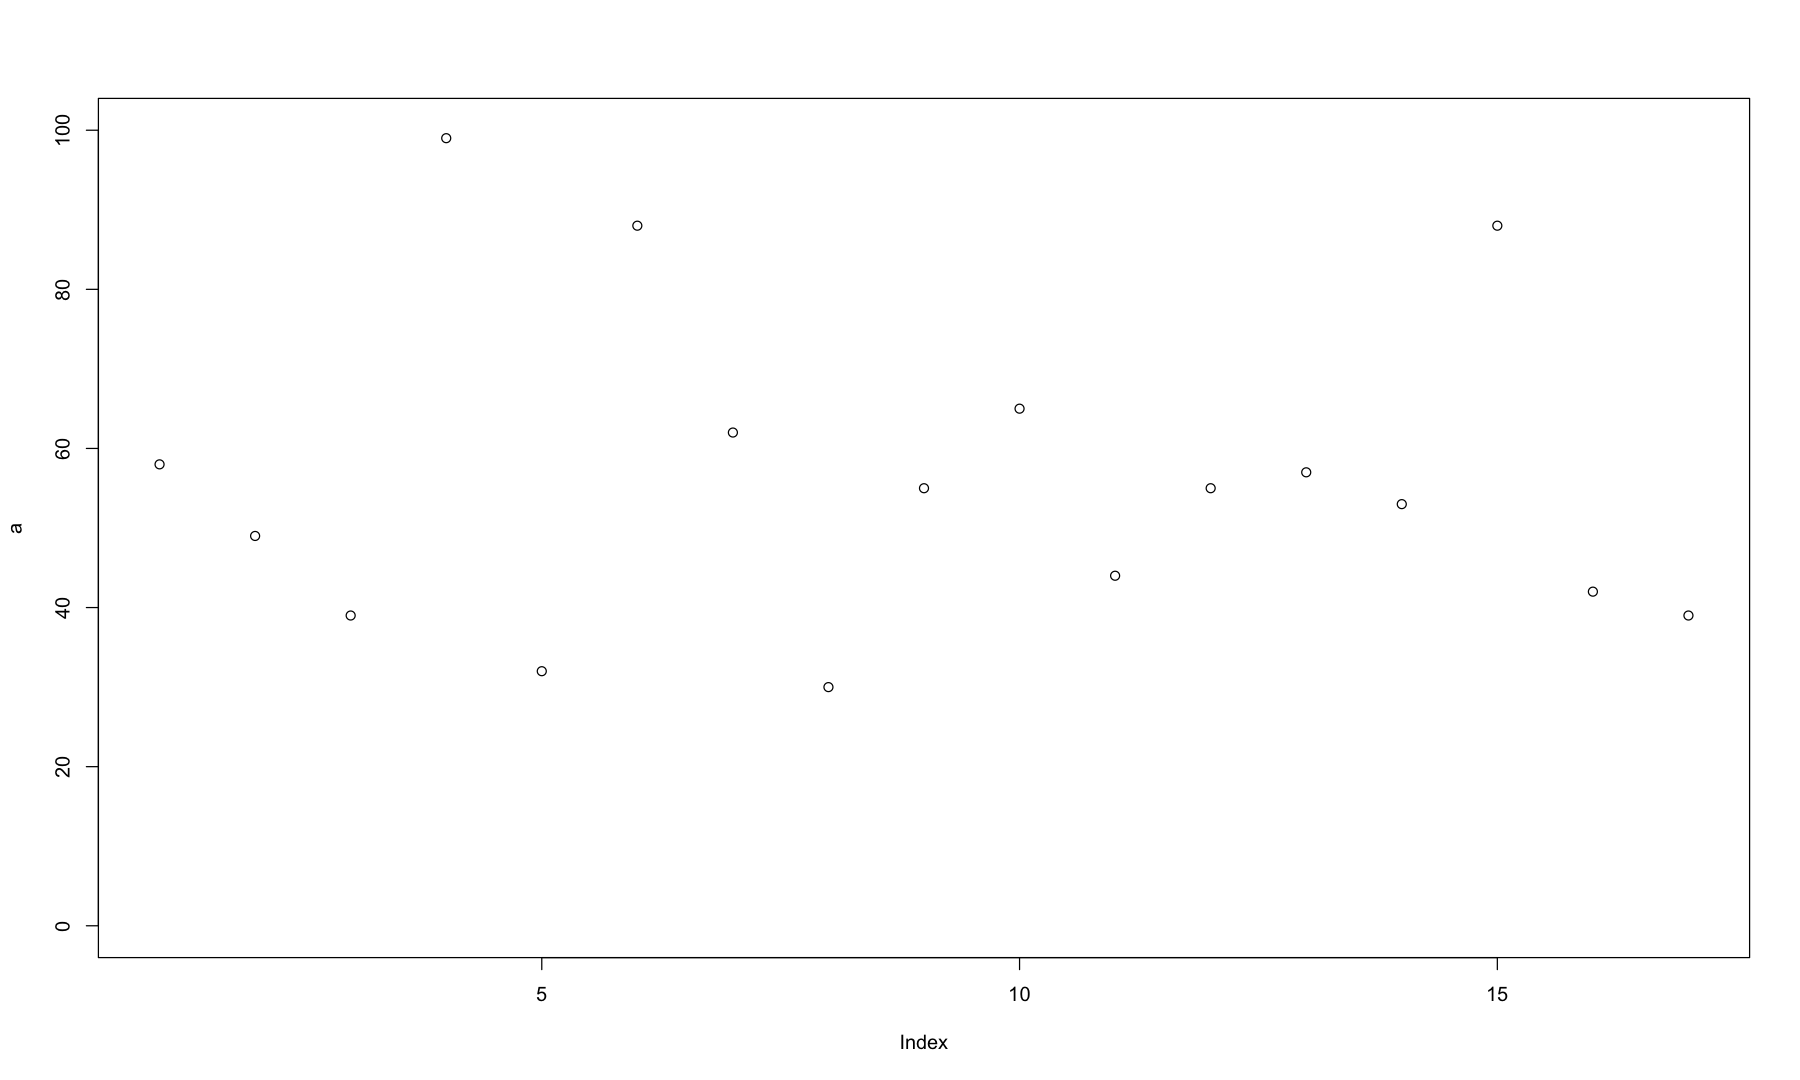

In [20]:
par(bg = "white")
plot(a, ylim = c(0, 100))

### 부호 검정
: 2개의 데이터 사이에 차이가 있는지 검정

In [21]:
# 식사전과 식사후의 음료수 맛에 대한 평가
x <- c(4, 1, 1, 4, 3, 3, 2, 5, 3, 3) # 식사전의 음료수 맛에 대한 설문 평가
y <- c(1, 1, 3, 2, 5, 1, 4, 4, 3, 1) # 식사후의 음료수 맛에 대한 설문 평가

In [22]:
# 귀무가설 : 유의미한 차이가 없다.
# 대립가설 : 유의미한 차이가 있다.

In [23]:
binom.test(c(length(x[x>y]), length(x[x<y])))


	Exact binomial test

data:  c(length(x[x > y]), length(x[x < y]))
number of successes = 5, number of trials = 8, p-value = 0.7266
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2448632 0.9147666
sample estimates:
probability of success 
                 0.625 


p-value = 0.7266 > 0.05 --> 귀무가설

### 비율 검정
: 2개의 데이터 사이에 비율의 차이가 있는지에 대한 것을 검정

In [24]:
# 맥주를 좋아하시나요? 라는 질문에 서울에서는 400 명중 360명, 부산에서는 200명중 136명이 좋아한다고 답했다면
# 둘의 비율 차이가 있다고 할 수 있는가?

# 귀무가설 : 유의미한 차이가 없다.
# 대립가설 : 유의미한 차이가 있다.

hite <- c(360, 136)
sample <- c(400, 200)

prop.test(hite, sample)


	2-sample test for equality of proportions with continuity correction

data:  hite out of sample
X-squared = 43.515, df = 1, p-value = 4.207e-11
alternative hypothesis: two.sided
95 percent confidence interval:
 0.14523 0.29477
sample estimates:
prop 1 prop 2 
  0.90   0.68 


p-value = 4.207e-11 < 0.05 -> 대립가설

### 콜모고로프-스미노프 검정(KS Test)
: 주어진 2개의 데이터가 같은 분포를 하는 것을 검정하는것
- 귀무가설 : 두개의 데이터 분포가 같다
- 대립가설 : 두개의 데이터 분포가 다르다

In [36]:
x <- rnorm(50)
y <- runif(50)

ks.test(x, y)


	Exact two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.4, p-value = 0.0005823
alternative hypothesis: two-sided


p-value = 0.0005823 < 0.05  -> 대립가설 : 두개의 데이터 분포가 다르다.

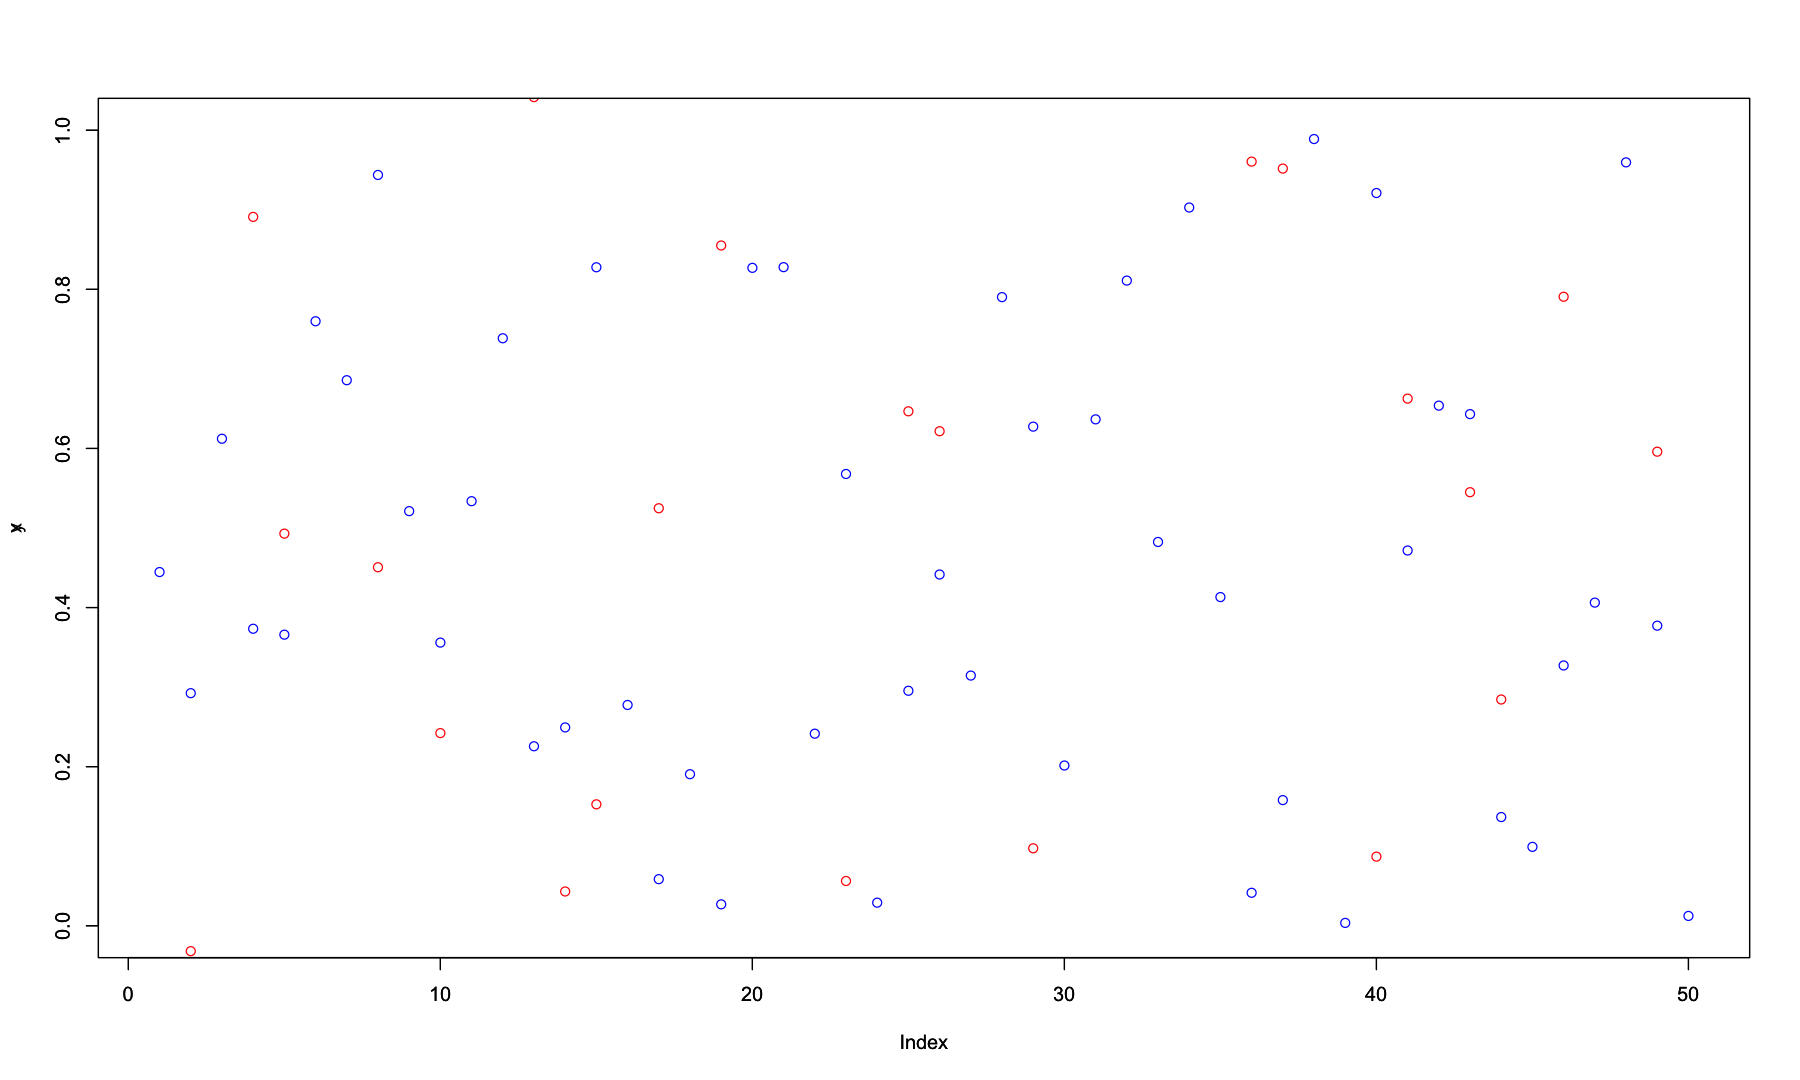

In [37]:
par(bg = "white")
plot(
    x,
    col = "red",
    ylim = c(0 , 1),
    type = "p"
)
par(new = T)
plot(
    y,
    col = "blue",
    ylim = c(0 , 1)
)